In [5]:
#import needed packages
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
def loadDataSet(path):
    data = np.loadtxt(path, delimiter=',',skiprows=1)  #load csv file without the header row
    sorted_data = sorted(data[:], key = lambda x: x[2]) #sort the data based on 3rd column i.e. class
    class1 = []
    class2 = []
    for i in range(len(sorted_data)):
        if(sorted_data[i][2] == 0):
            class1.append([sorted_data[i][0], sorted_data[i][1]]) #class 1 contains data with class label 0
        else:
            class2.append([sorted_data[i][0], sorted_data[i][1]]) #class 2 contains data with class label 1
    return (np.array(class1), np.array(class2))

In [3]:
def euclid_distance(x, y):
    return np.sqrt(np.sum((x-y)**2))

In [4]:
def NearestNeighbor(weight, height):
    global class1
    global class2
    len1 = len(class1)
    len2 = len(class2)
    
    min_distance_from_class1 = 999999
    for i in range(len1): #find the minimum euclidean distance data point from given point to every point of class 1
        dist1 = euclid_distance(class1[i], np.array((weight, height)))
        if(min_distance_from_class1 > dist1):
            min_distance_from_class1 = dist1
    
    min_distance_from_class2 = 999999 
    for i in range(len2): #find the minimum euclidean distance data point from given point to every point of class 2
        dist2 = euclid_distance(class2[i], np.array((weight, height)))
        if(min_distance_from_class2 > dist2):
            min_distance_from_class2 = dist2
    
    if(min_distance_from_class1 < min_distance_from_class2): #if the point is closer to class 1
        class1 = np.vstack((class1, np.array((weight, height)))) #append that unknown point to class 1
        fig = plt.figure()
        plt.plot(class1[:, 0], class1[:, 1], 'x')
        plt.plot(class2[:, 0], class2[:, 1], '*')
        plt.show()
        return 1
    else:
        class2 = np.vstack((class2, np.array((weight, height)))) #append that unknown point to class 2
        fig = plt.figure()
        plt.plot(class1[:, 0], class1[:, 1], 'x')
        plt.plot(class2[:, 0], class2[:, 1], '*')
        plt.show()
        return 2

Do you want to proceed? Press y/ny
Enter Weight:100
Enter Height:6


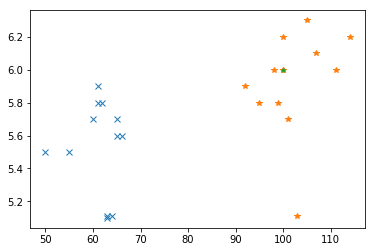

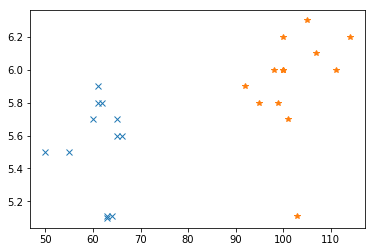

Predicted Class is:2
Do you want to proceed? Press y/nn


In [6]:
if __name__=="__main__":
    while(1):
        decision = input('Do you want to proceed? Press y/n')
        if (decision == 'n' or decision == 'N'):
            break
        weight = float(input('Enter Weight:'))
        height = float(input('Enter Height:'))
        path = 'NNData.csv'
        (class1, class2) = loadDataSet(path) #divide the data into two class
        fig = plt.figure() #show the classes
        plt.plot(class1[:, 0], class1[:, 1], 'x')
        plt.plot(class2[:, 0], class2[:, 1], '*')
        plt.plot(weight, height, '.')
        plt.show()
        x = NearestNeighbor(weight, height) #find the class of unknown data
        print('Predicted Class is:'+str(x)) 
        with open(path, 'a', newline='') as newFile: #append the data
            newFileWriter = csv.writer(newFile) 
            newFileWriter.writerow([weight, height, x-1])